In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import zscore
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
WH=pd.read_csv('World Happiness.csv')

In [3]:
WH

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


we have called the data set 'World Happines ' as WH

In [4]:
WH.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Showing top 5 worlds happiest country

In [5]:
WH.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


Showing least 5 worlds happiest country

In [6]:
WH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Explaind that data set consists of 2 object,1 int and 9 flaot columns and no null columns

In [7]:
WH.shape

(158, 12)

Data set has 158 rows and 12 columns

In [8]:
WH.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Data set has no null value

In [9]:
WH.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Data set has 2 object , 1 int and 9 float columns

### STATISTICS

In [10]:
WH.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observation
1)Mean is greatee than median in Trust 
2)Outliers are present in Trust and Generosity as there is huge difference in 75% and max

In [11]:
WH.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

THE total number of columns with name of the columns in data set

In [12]:
WH.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

There are no repeated countries in the dataset

In [13]:
WH.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

There are 10 unque regions in data set

In [14]:
WH.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

This explaind the number of countries in each region

### DATA VISUALISATION

<AxesSubplot:xlabel='Region', ylabel='count'>

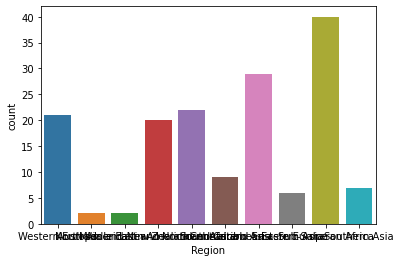

In [16]:
sns.countplot(WH['Region'])

In [17]:
WH=pd.read_csv('World Happiness.csv')

In [18]:
WH

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
ncols,nrows = (3,4)
collist=WH.columns.values
collist

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

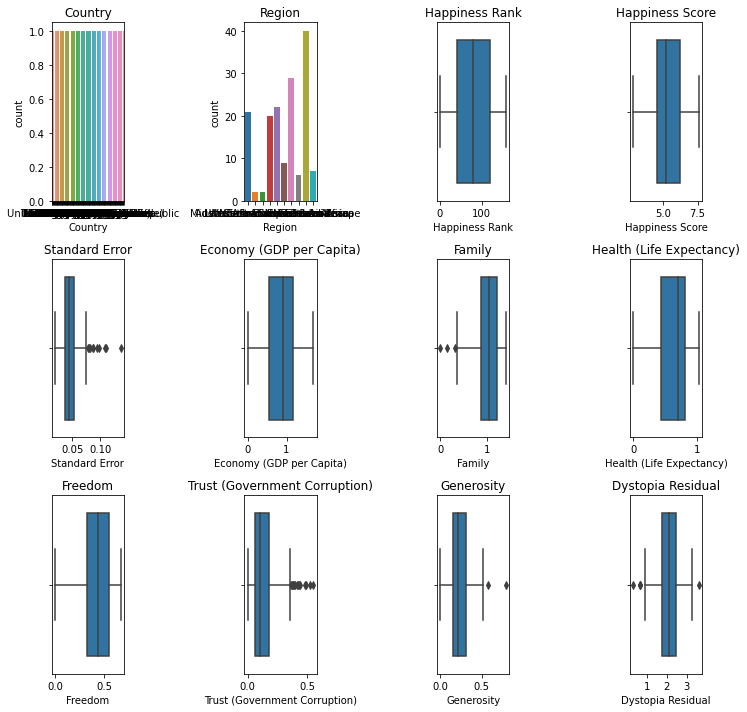

In [20]:
plt.figure(figsize=(10,10))
for index,col in enumerate(collist):
    plt.subplot( ncols, nrows, index+1)
    
    if WH[col].dtypes == 'object':
        sns.countplot(WH[col])
        plt.title(col)
        
        
    else:
        sns.boxplot(WH[col])
        plt.title(col)
        
        
    plt.tight_layout()
    
plt.show()  


Data set is visualised in countpot and box plot.
Outliers are present in standard error,family,trust,generosity amd dystopia rsidual.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

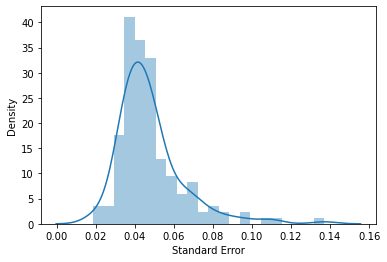

In [21]:
sns.distplot(WH['Standard Error'])

Standard Error is normaly distributed

<AxesSubplot:xlabel='Family', ylabel='Density'>

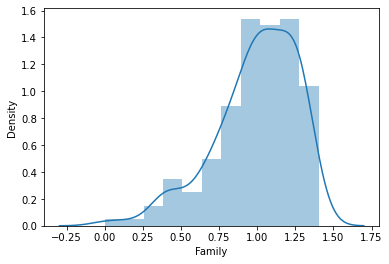

In [22]:
sns.distplot(WH['Family'])

Family is left skewed

In [23]:
ncols,nrows = (3,4)
columnlist=['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
columnlist

['Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

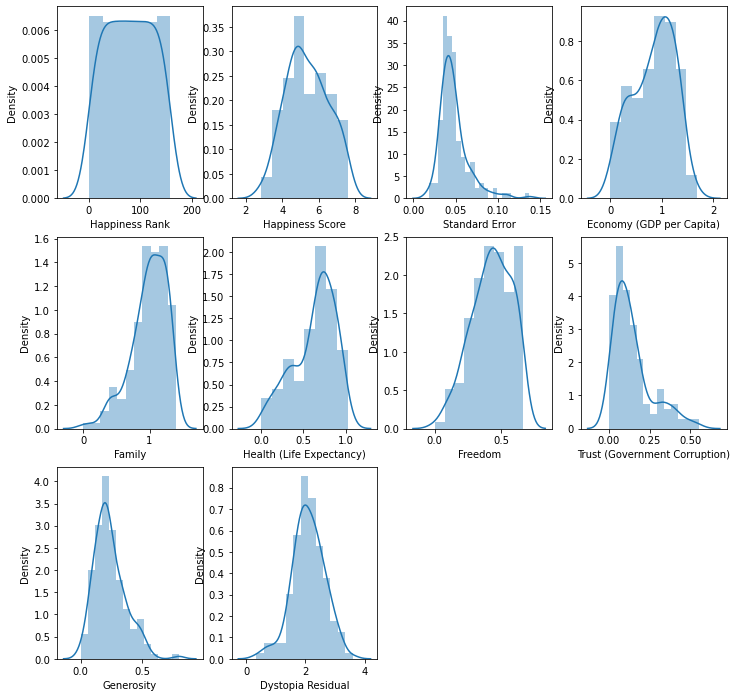

In [24]:
plt.figure(figsize=(12,12))
for index,col in enumerate(columnlist):
    plt.subplot(ncols,nrows,index+1)
    sns.distplot(WH[columnlist[index]])

Most of the columns are normaly distributed curves

##### Bivariative Analysis

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

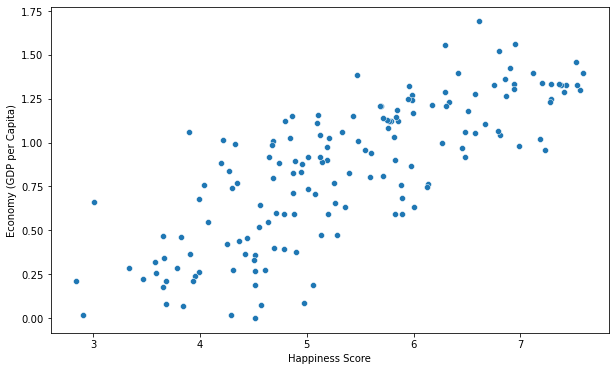

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(WH['Happiness Score'],WH['Economy (GDP per Capita)'])

Scatter plot between Happiness score and GDP

<AxesSubplot:xlabel='Happiness Rank', ylabel='Freedom'>

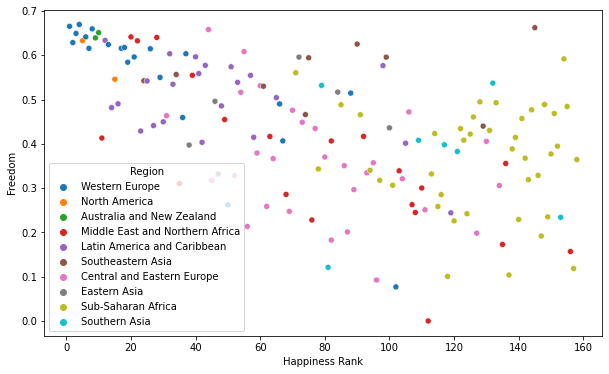

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(WH['Happiness Rank'],WH['Freedom'],hue=WH['Region'])

1)Western europe is happiest as there is more freedom
2)Sub-Saharn Africa is least happiest country though the freedom level is moderate
3)Central and eastern europe are moderate happy regions ranking from 60th to 120th in world

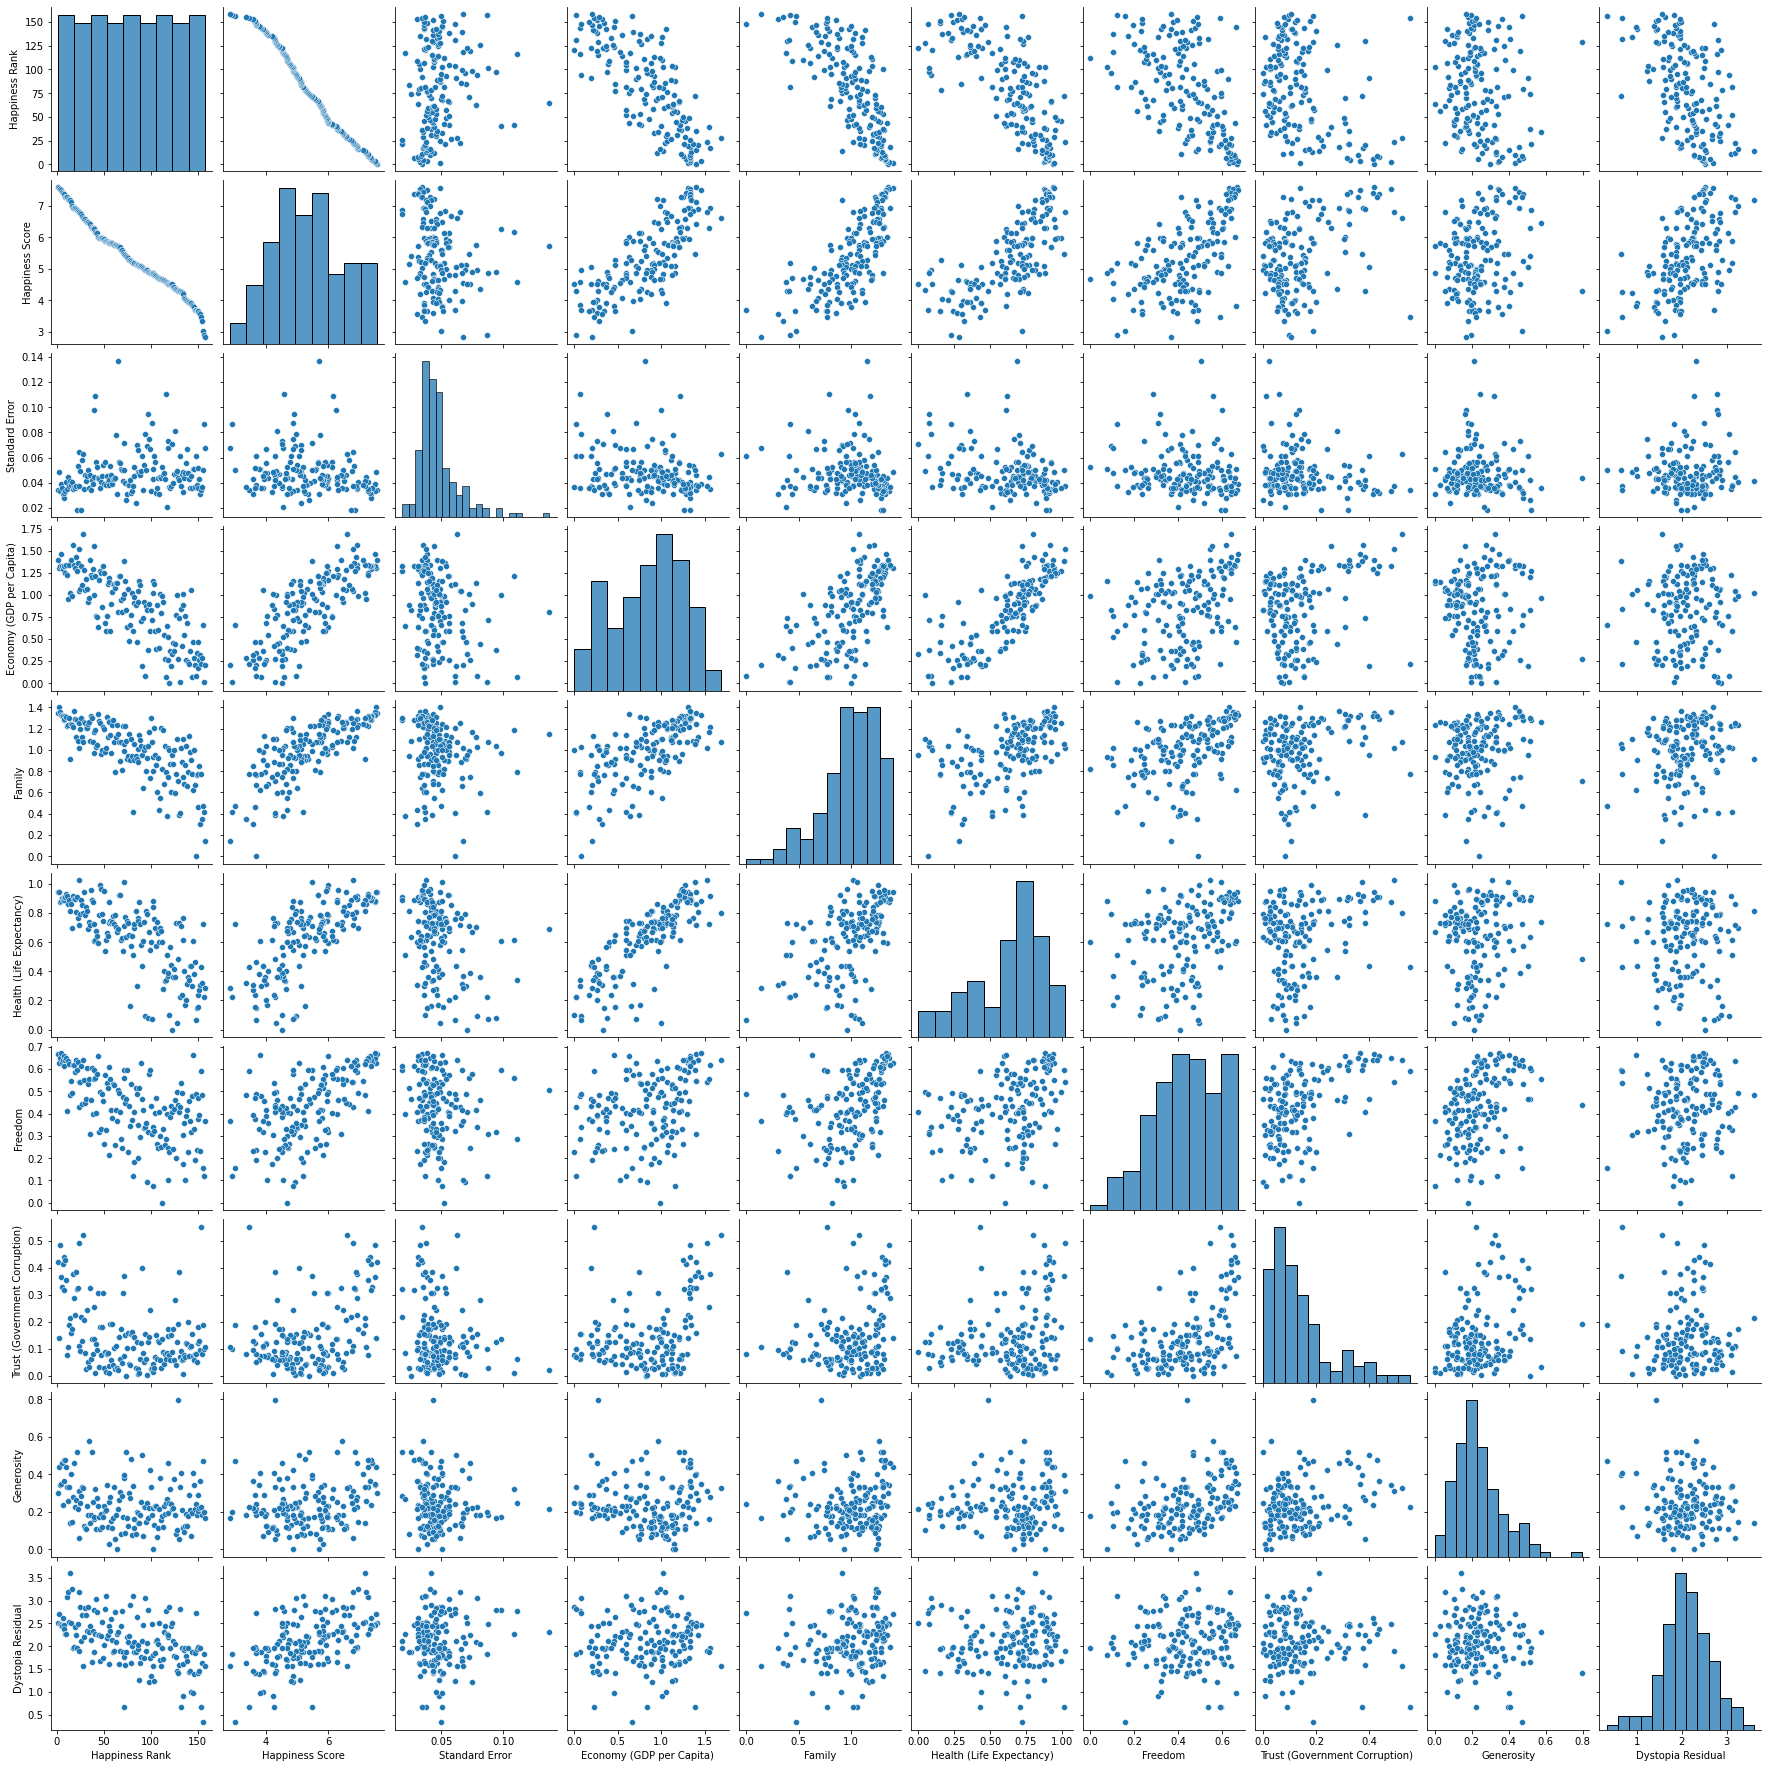

In [27]:
sns.pairplot(data=WH)

Interrelated plot layouts for world happiness

### Correlation

In [28]:
WH.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Correlation data about columns

<AxesSubplot:>

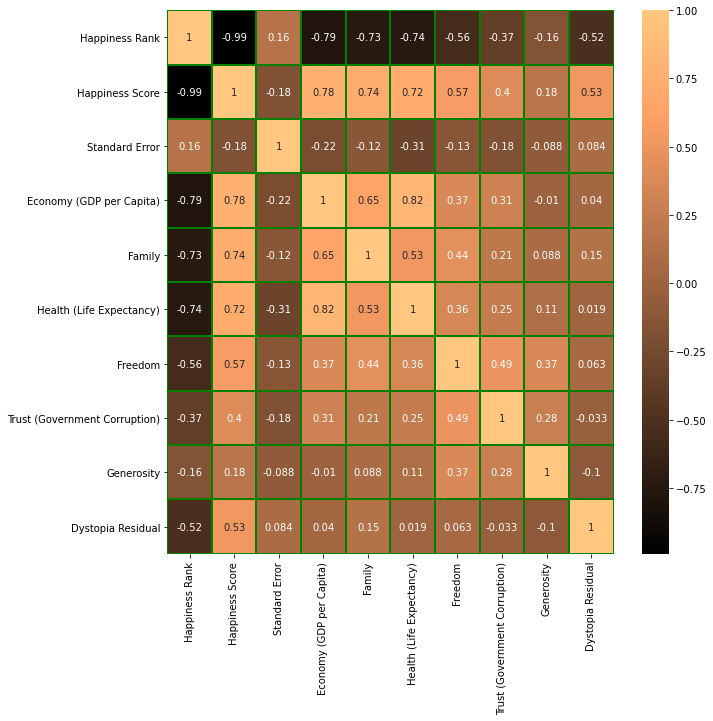

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(WH.corr(),annot=True,cmap='copper',linecolor='green',linewidths=1)

1)Happiness rank is very negatively correlated with happiness score.
2)Happiness score is very positevly correlated with happiness score.
3)Economy is positively correlated with health of the country.

### Label Encoder

In [30]:
LC=LabelEncoder()

In [31]:
LC

LabelEncoder()

Calling label encoder to change the region column into numerical.

In [32]:
LC.fit(WH['Region'])

LabelEncoder()

In [33]:
region=LC.transform(WH['Region'])

Region column is converted into numerical values

In [34]:
region

array([9, 9, 9, 9, 5, 9, 9, 9, 0, 0, 4, 3, 9, 3, 5, 3, 9, 9, 9, 4, 9, 4,
       3, 6, 3, 9, 3, 4, 9, 3, 1, 3, 3, 6, 4, 9, 9, 2, 4, 3, 3, 3, 3, 1,
       1, 2, 2, 3, 4, 9, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 6, 1, 4, 1, 3, 9,
       9, 4, 1, 1, 8, 2, 1, 6, 6, 4, 1, 8, 7, 1, 7, 4, 1, 2, 8, 1, 1, 9,
       1, 6, 8, 4, 1, 8, 1, 1, 8, 3, 6, 2, 8, 9, 4, 1, 3, 1, 4, 4, 7, 4,
       1, 4, 8, 8, 8, 8, 7, 8, 3, 8, 7, 8, 8, 8, 8, 8, 1, 8, 6, 1, 8, 7,
       8, 1, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 7, 8,
       8, 4, 8, 8])

In [35]:
region.reshape(-1,1)

array([[9],
       [9],
       [9],
       [9],
       [5],
       [9],
       [9],
       [9],
       [0],
       [0],
       [4],
       [3],
       [9],
       [3],
       [5],
       [3],
       [9],
       [9],
       [9],
       [4],
       [9],
       [4],
       [3],
       [6],
       [3],
       [9],
       [3],
       [4],
       [9],
       [3],
       [1],
       [3],
       [3],
       [6],
       [4],
       [9],
       [9],
       [2],
       [4],
       [3],
       [3],
       [3],
       [3],
       [1],
       [1],
       [2],
       [2],
       [3],
       [4],
       [9],
       [3],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3],
       [3],
       [1],
       [1],
       [6],
       [1],
       [4],
       [1],
       [3],
       [9],
       [9],
       [4],
       [1],
       [1],
       [8],
       [2],
       [1],
       [6],
       [6],
       [4],
       [1],
       [8],
       [7],
       [1],
       [7],
       [4],
       [1],
    

In [36]:
WH.insert(3,'REGION',region,True)

In [37]:
WH

,Country,Region,Happiness Rank,REGION,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


REGION column is added in the dataset after changing the string into integer 

In [38]:
WH.drop('Region',axis=1,inplace=True)

Region column is dropped from the data set

In [39]:
WH

,Country,Happiness Rank,REGION,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [40]:
WH.drop('Dystopia Residual',axis=1,inplace=True)

In [41]:
WH

,Country,Happiness Rank,REGION,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,155,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,156,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,157,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


Dystopia Residual column is dropped as it is not relating to happiness score as justified in summary

In [42]:
WH.corr()

,Happiness Rank,REGION,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,1.000000,0.213773,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142
REGION,0.213773,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557
Happiness Score,-0.992105,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
Standard Error,0.158516,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439
Economy (GDP per Capita),-0.785267,-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,-0.733644,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),-0.735613,-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,-0.556886,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),-0.372315,0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.160142,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


Checking the correlation again as Region column is added and Dystopia Residual is removed

<AxesSubplot:>

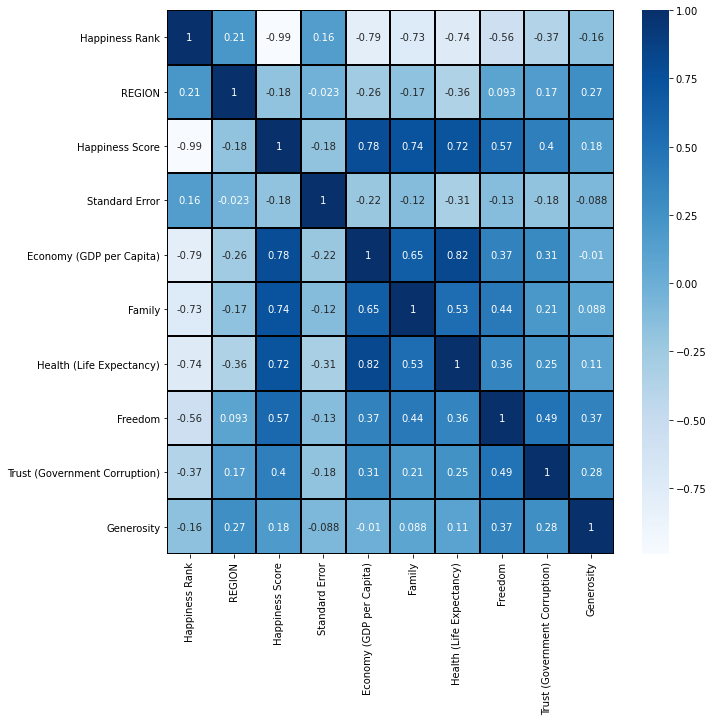

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(WH.corr(),annot=True,linewidth=1,linecolor='black',cmap='Blues')

correlation in graphical form through heat map

In [44]:
z=np.abs(zscore(WH.iloc[:,1:12]))

In [45]:
z

array([[1.72099989, 1.30025593, 1.93736005, ..., 1.57743784, 2.30965159,
        0.47103971],
       [1.69907456, 1.30025593, 1.91458063, ..., 1.33245589, 0.01647953,
        1.57585637],
       [1.67714922, 1.30025593, 1.88479215, ..., 1.4696591 , 2.8427738 ,
        0.8242928 ],
       ...,
       [1.67742676, 0.37544095, 2.0761992 , ..., 1.80923785, 0.38141902,
        1.85689094],
       [1.69935209, 0.96511655, 2.1646885 , ..., 2.06447176, 0.35771452,
        0.31694987],
       [1.72127743, 0.96511655, 2.22251319, ..., 0.42662099, 0.30180313,
        0.5581534 ]])

In [46]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 157], dtype=int64), array([8, 3, 3, 3, 9, 5, 8, 5], dtype=int64))


In [47]:
WH_new=WH[(z<3).all (axis=1)]

In [48]:
WH_new

,Country,Happiness Rank,REGION,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...,...
151,Burkina Faso,152,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,Afghanistan,153,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,Benin,155,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,156,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


Data set after removing the outliers in world happiness.

## MODEL LEARNING (LINEAR REGRESSION)

Model Linear Legression is used as happiness score is target and data is in continous form

In [49]:
x=WH_new.drop('Happiness Score',axis=1)

In [50]:
x=x.iloc[:,1:11]

In [51]:
x

,Happiness Rank,REGION,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
151,152,8,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,153,7,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,155,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,156,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


x is considered as data for model.

In [52]:
y=WH_new.iloc[:,3:4]

In [53]:
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
151,3.587
152,3.575
154,3.340
155,3.006


y is considered as target,label for model

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=44)

Train test split is called for spliting the data to test and train in model.

In [55]:
x_train.shape

(112, 9)

In [56]:
y_train.shape

(112, 1)

In [57]:
x_test.shape

(38, 9)

In [58]:
y_test.shape

(38, 1)

In [59]:
lm=LinearRegression()

Calling the LinearRegression model.

In [60]:
lm.fit(x_train,y_train)

LinearRegression()

In [61]:
lm.coef_

array([[-0.02421938,  0.01278887, -0.73027458,  0.0142261 ,  0.05900745,
        -0.03647887,  0.04033358,  0.31248117, -0.05984084]])

Coeficent values are perfect as they are not interelated

In [62]:
lm.intercept_

array([7.18698711])

Intercept value is 7.18698711

In [63]:
lm.score(x_train,y_train)

0.9890818400154191

Score of th linear regression model is : 98.9%

In [64]:
predic=lm.predict(x_test)
print('The predicted values are:',predic)
print('The actual values are:',y_test)

The predicted values are: [[3.70405117]
 [7.08877778]
 [5.25877799]
 [4.92357044]
 [4.6728869 ]
 [6.12218303]
 [4.35085873]
 [4.54720746]
 [4.69667292]
 [5.06258064]
 [6.99358836]
 [5.91805299]
 [6.17879231]
 [4.70418833]
 [6.56281513]
 [7.36418854]
 [4.66631059]
 [5.53613447]
 [6.47367164]
 [4.54374992]
 [5.50667239]
 [3.96147426]
 [3.46463204]
 [4.84129032]
 [3.71185306]
 [4.570179  ]
 [6.85632883]
 [5.84187039]
 [6.27777189]
 [5.34468298]
 [6.03508651]
 [4.86097648]
 [4.7579687 ]
 [4.54963908]
 [6.71144911]
 [5.05025122]
 [7.2889762 ]
 [6.41820814]]
The actual values are:      Happiness Score
150            3.655
9              7.284
82             5.192
98             4.876
107            4.715
49             5.948
122            4.507
110            4.681
105            4.786
93             4.971
17             6.940
54             5.848
48             5.960
104            4.788
29             6.574
3              7.522
108            4.694
68             5.589
33             6.45

These are actual values and predicted values by linear regression model.

In [65]:
print('error')

print('mean_squared_error',mean_squared_error(y_test,predic))
print('mean_absolute_error',mean_absolute_error(y_test,predic))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predic)))

error
mean_squared_error 0.020046460329490867
mean_absolute_error 0.10315075856427822
root_mean_squared_error 0.14158552302227395


### R2_SCORE

In [66]:
print(r2_score(y_test,predic))

0.9823559288883583


R2 score for world happiness data setbis 98.23 %

#### Lasso,Ridge and Elastic Net

In [68]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [81]:
LS=Lasso(alpha=0.001)

Calling lasso model with alpha=0.001

In [82]:
LS.fit(x_train,y_train)

Lasso(alpha=0.001)

In [83]:
LS.score(x_train,y_train)

0.9888418262263012

Score with Lasso model is : 98.8% at alpha=0.001

In [89]:
RS=Ridge(0.001)

Calling Ridge model at alpha=0.001

In [90]:
RS.fit(x_train,y_train)

Ridge(alpha=0.001)

In [91]:
RS.score(x_train,y_train)

0.9890816685851473

Score with Ridge model is : 98.9% at alpha=0.001

In [94]:
ES=ElasticNet(alpha=0.001)

In [95]:
ES.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [100]:
ES.score(x_train,y_train)

0.9889302578996836

Score with ElasticNet model is : 98.8% at alpha=0.001

## Loading The File

In [101]:
import joblib

In [103]:
WorldHappiness=joblib.dump(lm,'WH_new.obj')